In [1]:
%run function_and_library.ipynb

In [2]:
def open_file(num_row):
    # Initialize lists
    time_step = []
    sunspots = []
    currency = []

    with open('./currency_data_10_years.csv') as csvfile:

        reader = csv.reader(csvfile, delimiter=',')

        currency.append(next(reader)[num_row])
        
        for i,row in enumerate(reader):
            time_step.append(int(i))
            sunspots.append(float(row[num_row]))
            
    time = np.array(time_step)
    series = np.array(sunspots)
    
#     plot_series(time, series, xlabel='Day', ylabel=f'{currency}/IDR')
    return time, series, currency

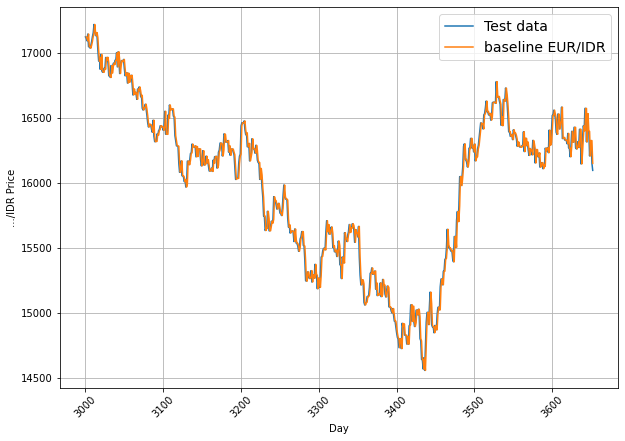

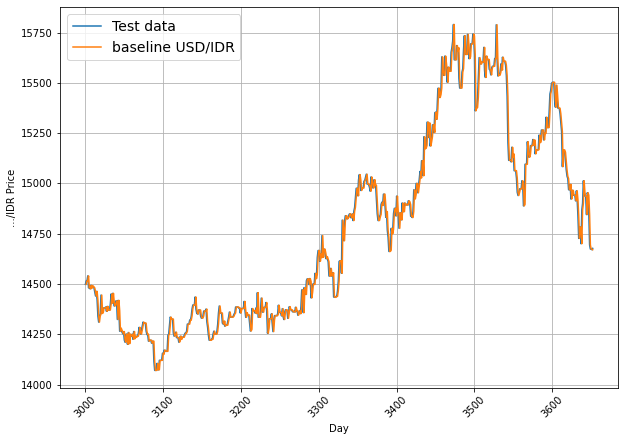

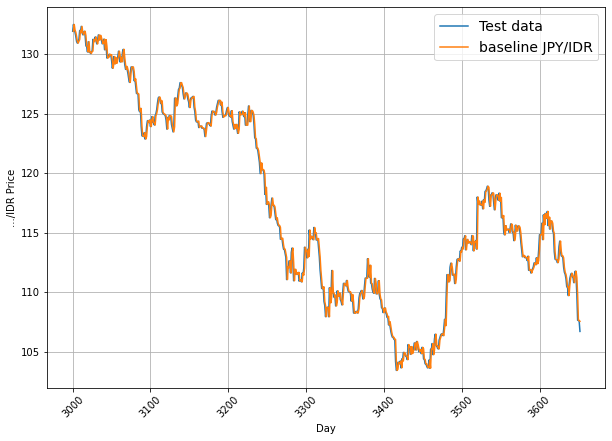

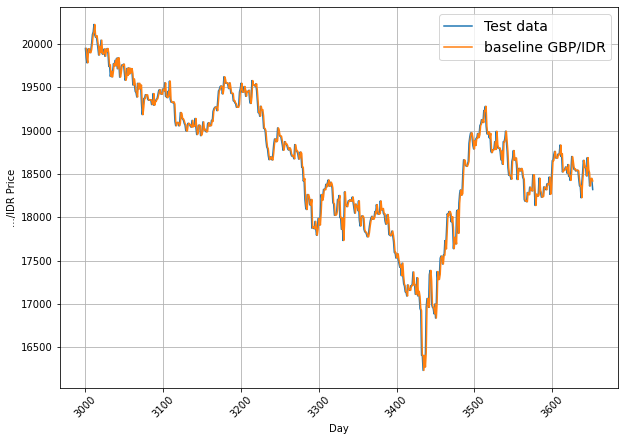

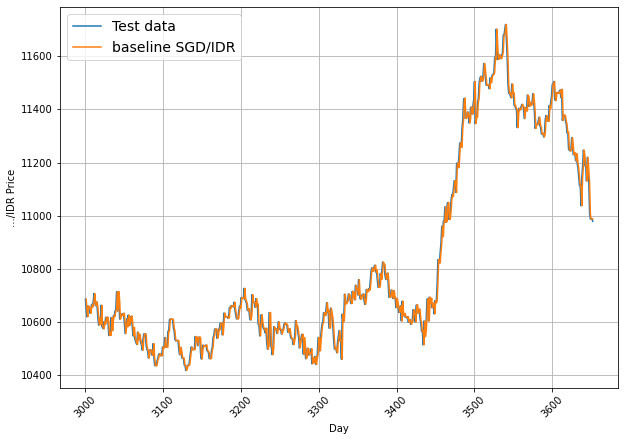

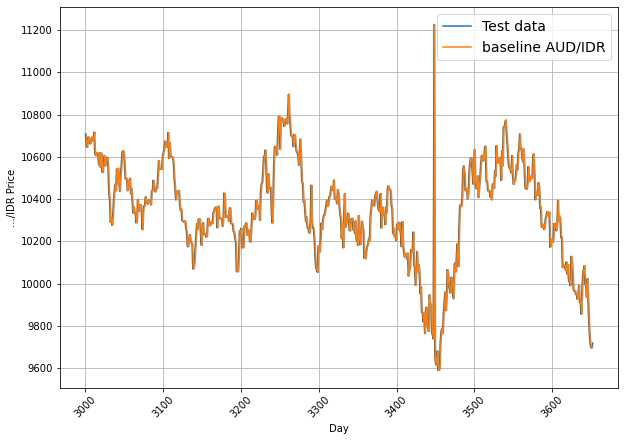

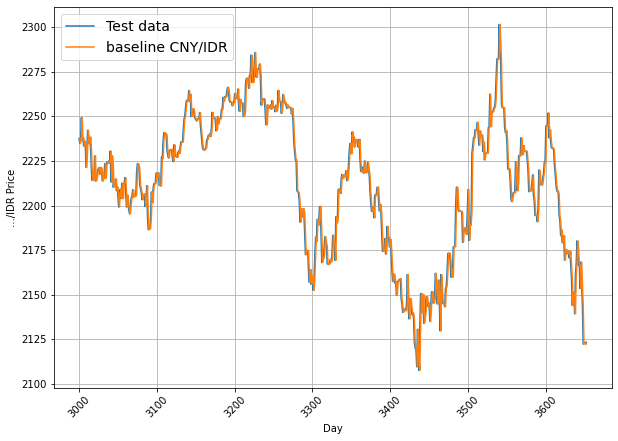

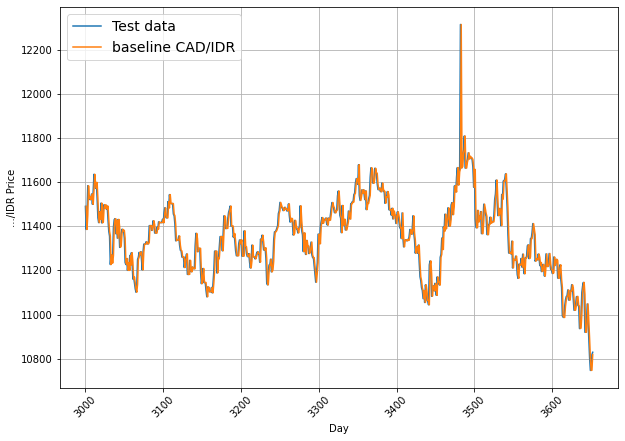

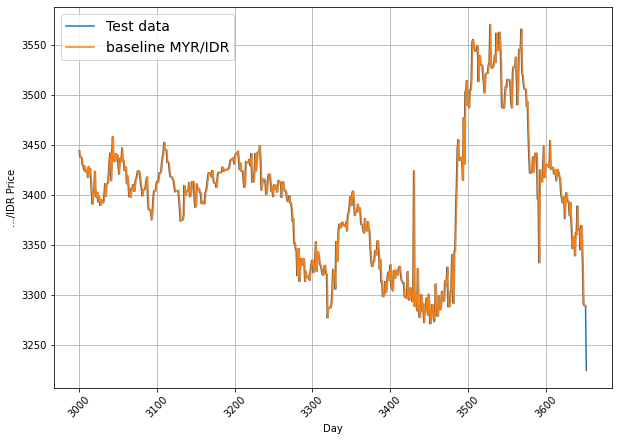

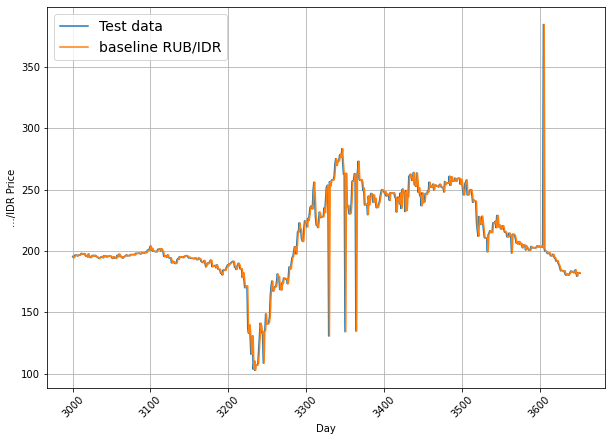

In [21]:
eval_models = {}

for i in range(1,11):

    time, series, currency = open_file(i)

    split_size = 3000

    X_train, y_train = time[:split_size], series[:split_size]

    X_test, y_test = time[split_size:], series[split_size:]
    
    baseline_model = y_test[:-1]
    
    plt.figure(figsize=(10,7))

    plot_time_series(timesteps=X_test, values=y_test, start=0, format="-", label="Test data")
    plot_time_series(timesteps=X_test[1:], values=baseline_model, start=0, format="-", label=f"baseline {currency[0]}/IDR")

    baseline_results = evaluate_preds(y_true=y_test[1:],
                                   y_pred=baseline_model)
    
    eval_models[f'baseline {currency[0]}/IDR'] = baseline_results


In [22]:
import pandas as pd
model_results = pd.DataFrame(eval_models).T
model_results.head(100)

,mae,mse,rmse,mape,mase
baseline EUR/IDR,51.751659,5236.000977,72.360214,0.324652,0.998762
baseline USD/IDR,31.845373,2461.851074,49.617043,0.213883,0.999277
baseline JPY/IDR,0.435941,0.393881,0.627600,0.375785,1.000481
baseline GBP/IDR,65.475639,9083.005859,95.304802,0.354747,1.001002
baseline SGD/IDR,23.616543,1135.695801,33.700085,0.217716,1.001285
baseline AUD/IDR,47.184845,10568.250000,102.801994,0.456937,1.000231
baseline CNY/IDR,4.906847,51.525898,7.178154,0.222625,0.999275
baseline CAD/IDR,35.912437,3517.775391,59.310837,0.315745,1.002938
baseline MYR/IDR,8.882758,243.815186,15.614582,0.261831,0.999543
baseline RUB/IDR,4.418012,274.240356,16.560204,2.223729,0.998836


In [28]:
from datetime import datetime

def parser(x):
    return datetime.strptime(x, '%Y-%m-%d')

def open_file(num_row):
    series = pd.read_csv('./currency_data_10_years.csv', header=0, parse_dates=[0], index_col=0, squeeze=True, date_parser=parser)
    
    currency = series.columns.tolist()
    
    series = series.iloc[:,num_row-1]

    series = series.resample('3D').mean()
            
    time = series.index

    return time, series, currency

<ipython-input-28-03090826f550>:7: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  series = pd.read_csv('./currency_data_10_years.csv', header=0, parse_dates=[0], index_col=0, squeeze=True, date_parser=parser)
<ipython-input-28-03090826f550>:7: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  series = pd.read_csv('./currency_data_10_years.csv', header=0, parse_dates=[0], index_col=0, squeeze=True, date_parser=parser)
<ipython-input-28-03090826f550>:7: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  series = pd.read_csv('./currency_data_10_years.csv', header=0, parse_dates=[0], index_col=0, squeeze=True, date_parser=parser)
<ipython-input-28-03090826f550>:7: FutureWarning: The sque

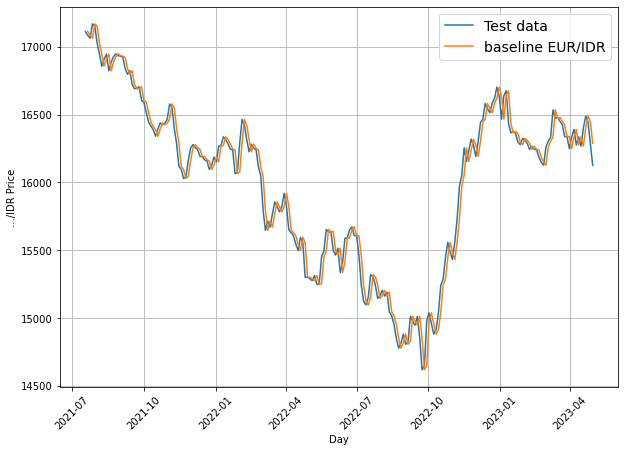

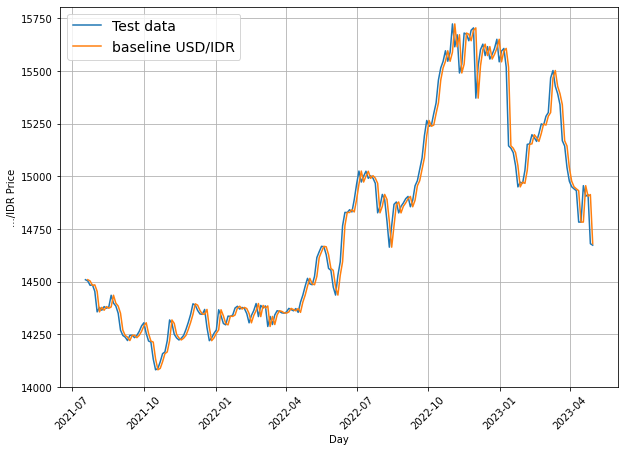

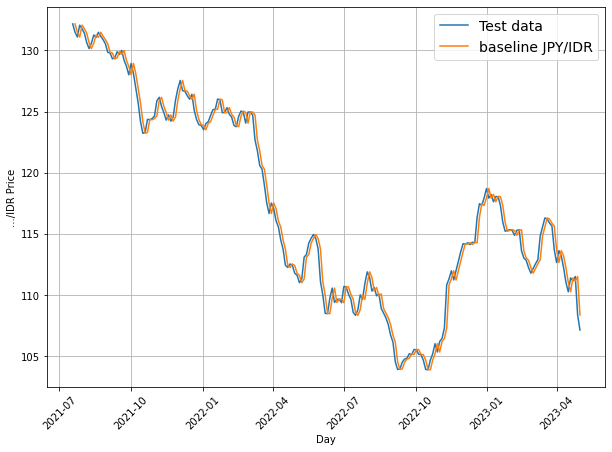

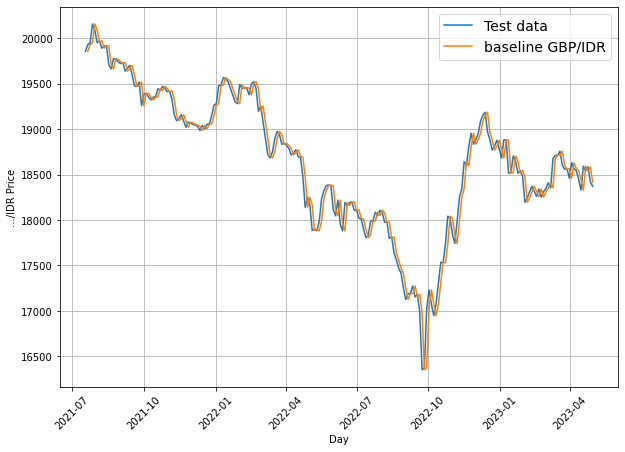

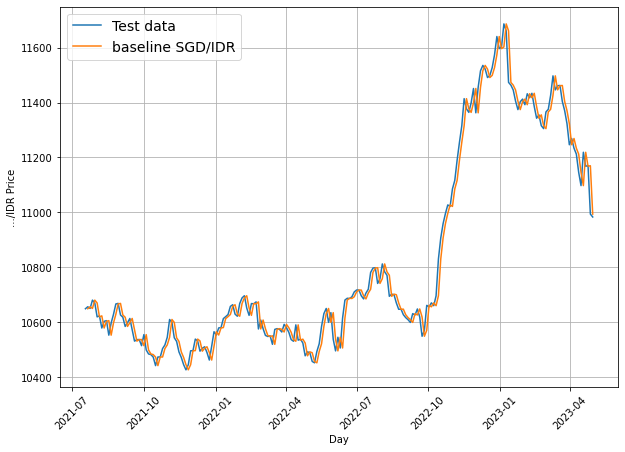

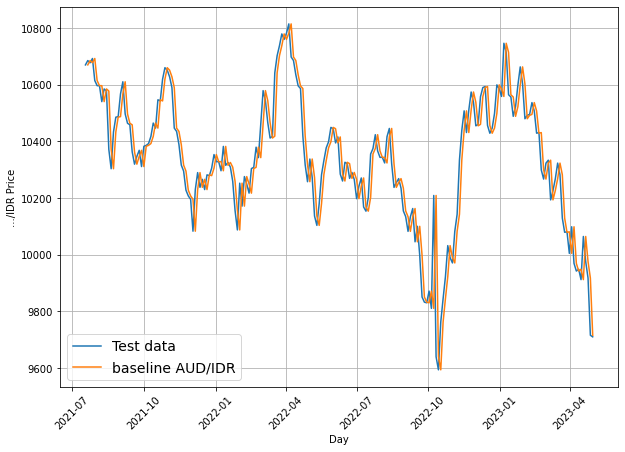

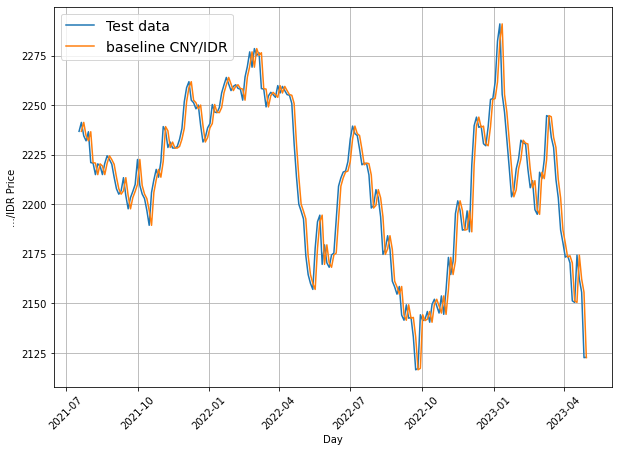

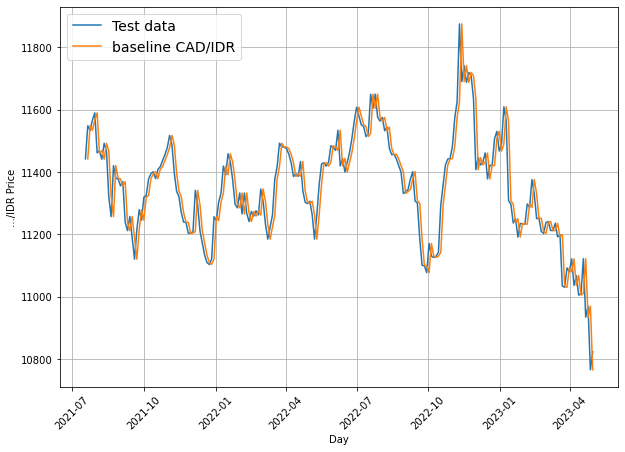

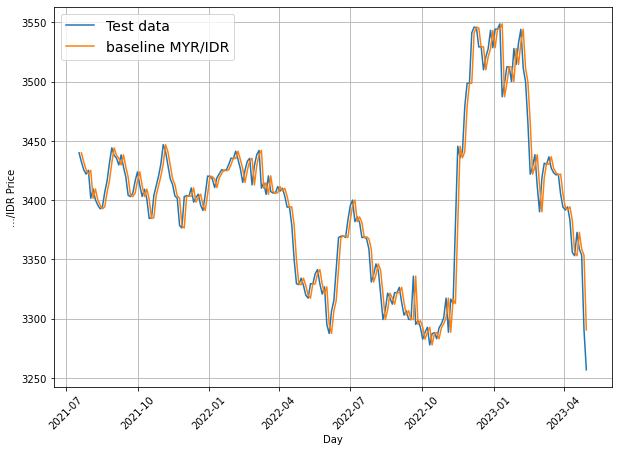

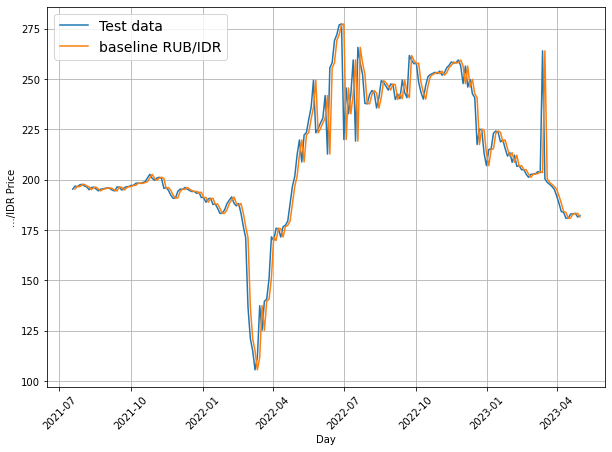

In [31]:
eval_models_2 = {}

for i in range(1,11):

    time, series, currency = open_file(i)

    split_size = 1000

    X_train, y_train = time[:split_size], series[:split_size]

    X_test, y_test = time[split_size:], series[split_size:]
    
    baseline_model = y_test[:-1]
    
    plt.figure(figsize=(10,7))

    plot_time_series(timesteps=X_test, values=y_test, start=0, format="-", label="Test data")
    plot_time_series(timesteps=X_test[1:], values=baseline_model, start=0, format="-", label=f"baseline {currency[i-1]}/IDR")

    baseline_results = evaluate_preds(y_true=y_test[1:],
                                   y_pred=baseline_model)
    
    eval_models_2[f'baseline {currency[i-1]}/IDR'] = baseline_results

In [32]:
import pandas as pd
model_results = pd.DataFrame(eval_models_2).T
model_results.head(100)

,mae,mse,rmse,mape,mase
baseline EUR/IDR,72.673050,8998.585938,94.860878,0.457341,0.997146
baseline USD/IDR,45.803535,4595.275391,67.788460,0.307373,0.996005
baseline JPY/IDR,0.635122,0.682662,0.826233,0.547579,1.000323
baseline GBP/IDR,94.872162,18170.812500,134.799149,0.516300,0.998943
baseline SGD/IDR,32.336018,1881.703613,43.378609,0.296849,0.996403
baseline AUD/IDR,62.065762,7711.074707,87.812729,0.604020,0.996521
baseline CNY/IDR,7.423312,98.304588,9.914867,0.336461,0.998185
baseline CAD/IDR,47.517887,4319.556641,65.723335,0.418915,1.005729
baseline MYR/IDR,11.343126,262.636383,16.206060,0.333920,0.998513
baseline RUB/IDR,5.412201,123.809280,11.126962,2.618751,0.996658
